In [35]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np

url = "https://raw.githubusercontent.com/PhiPhuongUyen/Team-5/main/marketing_campaign.csv"
df= pd.read_csv(url, sep="\t")
pysqldf = lambda q: sqldf(q, globals())
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [39]:

query = '''
SELECT 
    Year_Birth,
    COUNT(*) AS count
FROM 
    (SELECT 
        CASE
            WHEN Year_Birth BETWEEN 1890 AND 1950 THEN '1900-1950'
            WHEN Year_Birth BETWEEN 1951 AND 1960 THEN '1951-1960'
            WHEN Year_Birth BETWEEN 1961 AND 1970 THEN '1961-1970'
            WHEN Year_Birth BETWEEN 1971 AND 1980 THEN '1971-1980'
            WHEN Year_Birth BETWEEN 1981 AND 2000 THEN '1981-2000'
            ELSE 'Other'
        END AS Year_Birth
    FROM 
        df) AS subquery
GROUP BY 
    Year_Birth;
'''

dfpie1 = sqldf(query, locals())

dfpie1

,Year_Birth,count
0,1900-1950,139
1,1951-1960,480
2,1961-1970,534
3,1971-1980,702
4,1981-1990,342
5,1990-2000,43


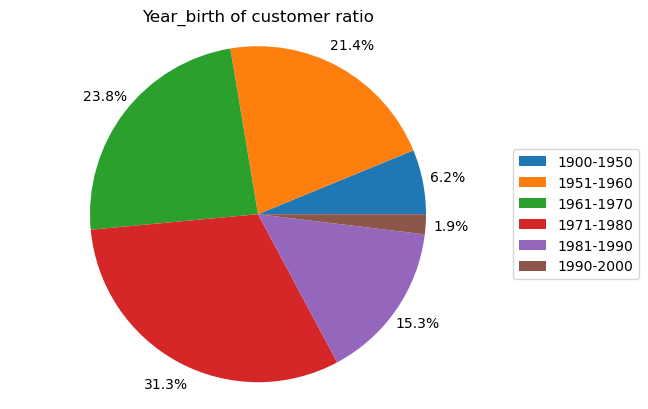

In [40]:
import matplotlib.pyplot as plt

labels = dfpie1['Year_Birth']
sizes = dfpie1['count']

plt.pie(sizes, autopct='%1.1f%%', pctdistance=1.15)
plt.axis('equal')
plt.title('Year_birth of customer ratio')

plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('pie_chart.png')

plt.show()

In [ ]:
biểu đồ tròn trên đây là tỷ lệ năm sinh của khách hàng từ đó giúp đánh giá, nắm bắt được nhu cầu, hành vi, phân loại nhóm độ tuổi của khách hàng để nâng cao trải nghiệm mua hàng, tăng doanh thu bán hàng. Như chúng ta có thể thấy, trên biểu đồ nhóm độ tuổi từ 1971 đến 1980 là chiếm tỷ lệ cao nhất. Sau đó đến 1961-1970, 1951-1960, 1981-1990 và các năm khác.